# Training and Testing 

## Importing all necessary libraries and function

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

## Loading the dataset

In [3]:
#Reading data from train.csv
Data=pd.read_csv("train.csv")
Data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Label Encoding

In [4]:
#Encoing the lebels
le = LabelEncoder()
Data['Work'] = le.fit_transform(Data.Work)
Data['Work'].sample(10)

6127    1
4389    2
6085    2
2390    2
2481    3
1694    3
6953    5
1035    1
3826    1
5106    1
Name: Work, dtype: int32

## Allocating train features and targets

In [5]:
Train_features=Data.iloc[:,:-1].copy()
Train_targets=Data['Work'].copy()
Train_targets_reduced=Data['Work'].copy()

## Importing test file

In [6]:
Test_Data=pd.read_csv("test.csv")
Test_Data['Work']=le.transform(Test_Data['Work'])
Test_features=Test_Data.iloc[:,:-1].copy()
Test_targets=Test_Data['Work'].copy()

## Feature Selection by using Correlation Filter

In [7]:

cor_matrix = Train_features.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

print("Number of High correlation features:",len(to_drop))

Number of High correlation features: 440


#### Thus we will remove these features having high correlation as they show similar trends

## Applying Correlation filter on train and test data

In [8]:
#Applying High correlation filter on train data

Train_features_reduced = Train_features.drop(to_drop, axis=1)
print("Shape after applying High correlation filter(Train) :",Train_features_reduced.shape)



#Applying High correlation filter to test data
Test_features_reduced = Test_features.drop(to_drop,axis=1)
print("Shape after applying High correlation filter(Test):",Test_features_reduced.shape)




Shape after applying High correlation filter(Train) : (7352, 109)
Shape after applying High correlation filter(Test): (2947, 109)


## Splitting Train Set to Train-Validation Set (All features)

In [9]:
#Splitting the train set into train and validation set 
Train_features, CV_features,Train_targets, CV_targets=train_test_split(Train_features,Train_targets,test_size=0.2,random_state=42)


## Dictionary of different ML models to evaluate 

In [10]:
def define_models(models=dict()):
    # nonlinear models
    models['LogisticRegression']   = LogisticRegression(solver='liblinear')
    models['LogisticRegression_L1'] = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear')
    models['LogisticRegression_L2'] = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear')
    models['KNeighborsClassifier'] = KNeighborsClassifier(n_neighbors=7)
    models['SVM'] = svm.SVC(kernel='linear',C=1.0)
    # ensemble models
    models['RandomForestClassifier'] = RandomForestClassifier(n_estimators=700)
    models['ExtraTreesClassifier']   = ExtraTreesClassifier(n_estimators=700)
    print('Defined %d models' % len(models))
    return models

## Function for evaluation of different models

In [11]:
def evaluate_model(X_train,Y_train,X_cv,Y_cv, model):
    model.fit(X_train,Y_train)
    prediction = model.predict(X_cv)
    accuracy = accuracy_score(Y_cv, prediction)
    return accuracy * 100
 

In [12]:
def evaluate_models(X_train,Y_train,X_cv,Y_cv, model):
    accuracy = dict()
    for name, model in models.items():
        accuracy[name] = evaluate_model(X_train,Y_train,X_cv,Y_cv, model)
        print("Accuracy of %s : %d"%(name,accuracy[name]))
        

## Evaluating original dataset on different models

In [13]:
models = define_models()
evaluate_models(Train_features,Train_targets, CV_features, CV_targets, models)

Defined 7 models
Accuracy of LogisticRegression : 98
Accuracy of LogisticRegression_L1 : 98
Accuracy of LogisticRegression_L2 : 98
Accuracy of KNeighborsClassifier : 97
Accuracy of SVM : 98
Accuracy of RandomForestClassifier : 97
Accuracy of ExtraTreesClassifier : 99


#### We got these accuracies when we didn't perform feature reduction

## Splitting Train Set to Train-Validation Set (Reduced features)

In [14]:

Train_features_reduced, CV_features_reduced,Train_targets_reduced, CV_targets_reduced=train_test_split(Train_features_reduced,Train_targets_reduced,test_size=0.2,random_state=42)


## Evaluating modified dataset on different models

In [15]:
#Evaluatin the models on reduced features
print("Accuracy of models with reduced features :")
evaluate_models(Train_features_reduced,Train_targets_reduced, CV_features_reduced, CV_targets_reduced,models)

Accuracy of models with reduced features :
Accuracy of LogisticRegression : 94
Accuracy of LogisticRegression_L1 : 94
Accuracy of LogisticRegression_L2 : 94
Accuracy of KNeighborsClassifier : 95
Accuracy of SVM : 94
Accuracy of RandomForestClassifier : 96
Accuracy of ExtraTreesClassifier : 97


#### Extra Trees Classifier gave the best accuracy on validation set. Thus, we will use this for evaluation on test set.

## Testing our model on Test Set

In [16]:
et_reduced=ExtraTreesClassifier(n_estimators=700)
et_reduced.fit(Train_features_reduced,Train_targets_reduced)
prediction = et_reduced.predict(Test_features_reduced)
accuracy = accuracy_score(Test_targets,prediction)
print("The final Test accuracy of the best fit model Extra Tree Classifier is %d"%(accuracy*100))

The final Test accuracy of the best fit model Extra Tree Classifier is 94


## Visualising Confusion matrix for Extra Tree classifier trained with reduced features

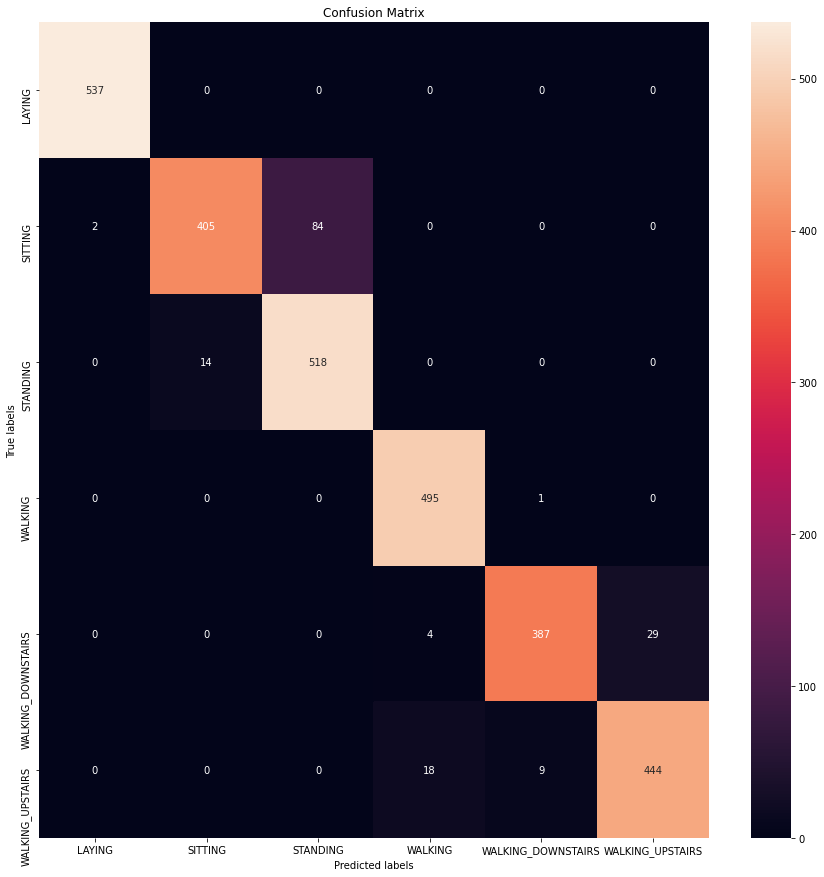

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Test_targets,prediction)

import seaborn as sns
import matplotlib.pyplot as plt  
ax=plt.figure(figsize=(15,15))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(le.classes_); ax.yaxis.set_ticklabels(le.classes_);